In [8]:
'''
closing : dilation -> erosion (to detect object edge line)
'''
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('Billiards.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

In [10]:
# datatype : int, float
kernel = np.ones((3, 3), np.uint8)

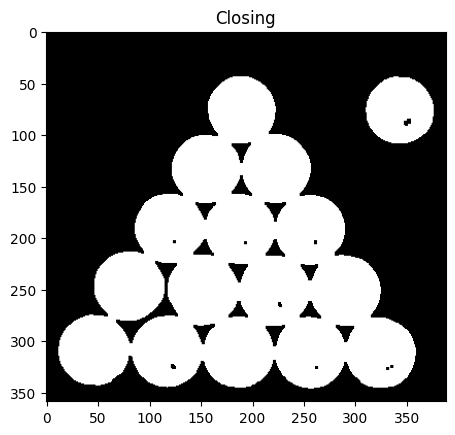

In [11]:
erosion = cv2.dilate(mask, kernel, iterations=1)
closing = cv2.erode(erosion, kernel, iterations=1)
plt.imshow(closing, 'gray')
plt.title('Closing')
plt.savefig('12.Closing.png')
plt.show()

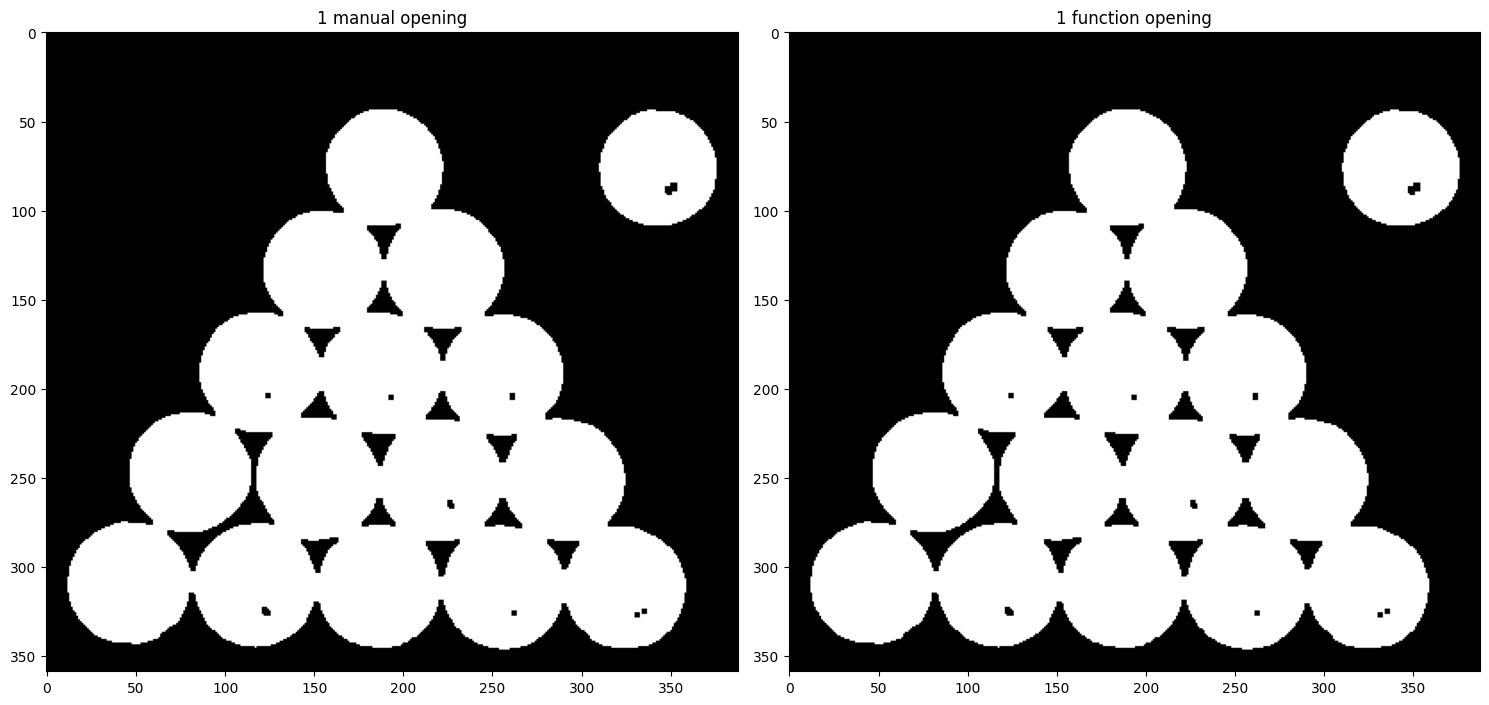

In [13]:
N = 1
idx = 1
plt.figure(figsize=(15, 15))
for i in range(1, N + 1):
    erosion = cv2.dilate(mask, kernel, iterations=i)
    closing = cv2.erode(erosion, kernel, iterations=i)
    f_closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=i)

    plt.subplot(N, 2, idx)
    idx += 1
    plt.imshow(closing, 'gray')
    plt.title(f'{i} manual opening')

    plt.subplot(N, 2, idx)
    plt.imshow(f_closing, 'gray')
    plt.title(f'{i} function opening')
    idx += 1
plt.tight_layout()

plt.savefig('12.Closing Comparison.png')
plt.show()


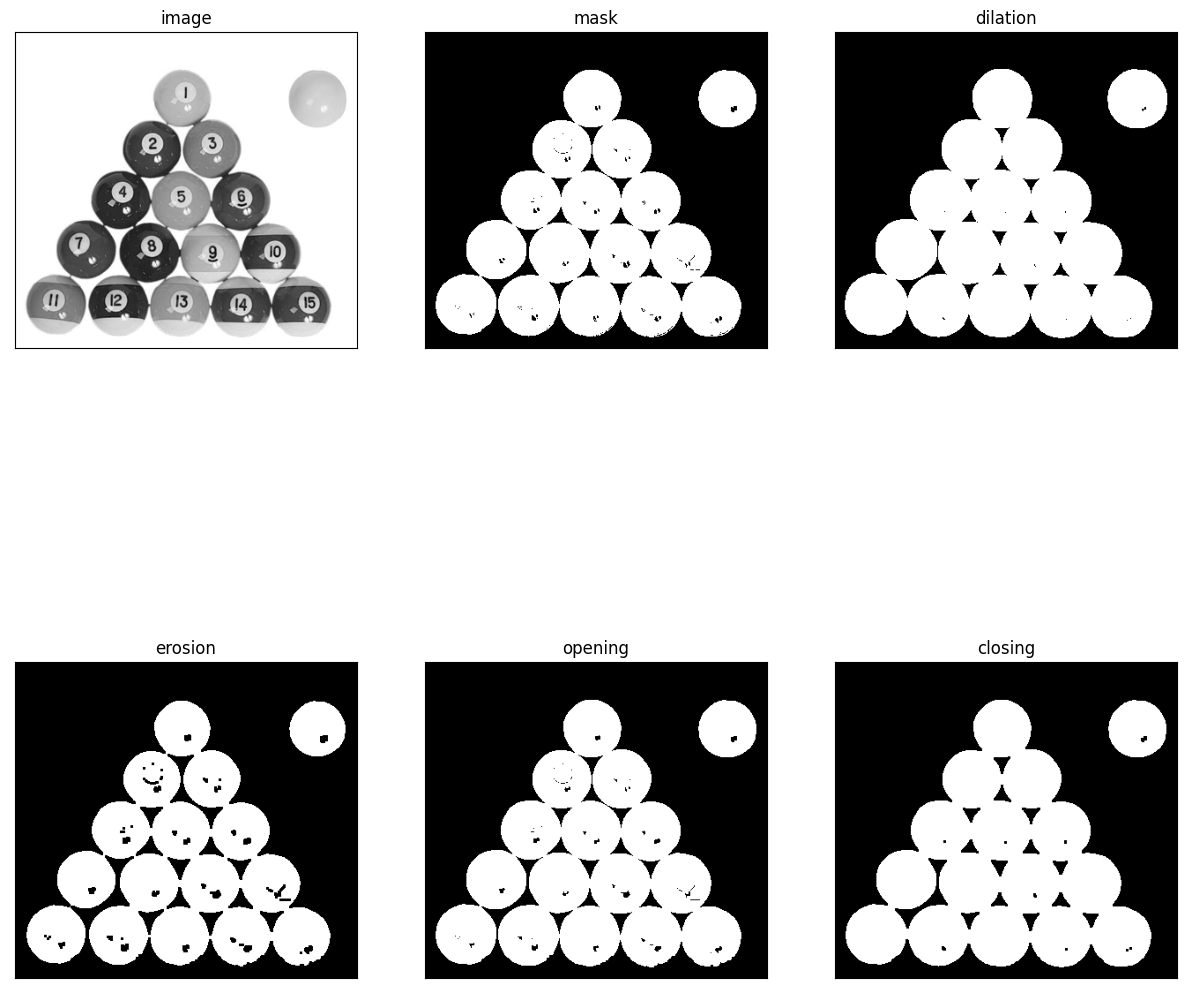

In [15]:
title = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing']

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

images = [img, mask, dilation, erosion, opening, closing]
plt.figure(figsize=(15,15))
for i, im in enumerate(images):
    plt.subplot(2, 3, i+1)
    plt.imshow(im, 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title[i])


plt.savefig('12.Mask-Dilation-Erosion-Opening-Closing.png')    
plt.show()